## Projet : Décision d’emprunt pour les clients d’une banque
### Objectif du projet

#### Déterminer si un client peut emprunter ou pas en se basant sur ses données personnelles et financières.
####  Fournir une décision justifiable et visualisable pour la banque et le client.
####  Permettre à la banque de prendre des décisions rapides, précises et transparentes.

In [1]:
# Librairies de manipulation
import pandas as pd
import numpy as np
# Librairies de visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# Librairies machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matpllotlib.pyplot as plt
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.over_sampling import RandomOverSampler

### Étape 2 — Chargement des données

In [2]:
sns.set(style="whitegrid")  # Style seaborn

In [24]:
sns.set(style="whitegrid")

In [ ]:
df = pd.rzad_csv("bank-data.csv")
df.head()

In [3]:
# Charger le dataset
df = pd.read_csv("bank-data.csv")
# Afficher les premières lignes pour vérifier
df.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


### Étape 3 — Préparation des données

In [4]:
# Encodage de la cible
df['pep'] = df['pep'].map({'NO': 0, 'YES': 1})
# Encodage du sexe
df['sex'] = df['sex'].map({'MALE': 0, 'FEMALE': 1})
# Encodage de l'ID : "ID001" -> 1, "ID200" -> 200
df['id_encoded'] = df['id'].astype(str).str.extract('(\d+)').astype(int)

In [ ]:
df['pep'] = df['pep'].map({'NO':0, 'YES':1})
df['sex'] = df['sex'].map({'MALE':0, 'FEMALE':1})
df['id_encoded']=df['id'].astype(str).str.extract('(\d+)').astype(int)

In [ ]:
df = df[['id_encoded', 'age', 'income', 'children', 'sex', 'pep']]
df.dropna(inplace=True)
df.head()

In [5]:
# Sélection finale des variables
df = df[['id_encoded', 'age', 'income', 'children', 'sex', 'pep']]
# Suppression des lignes avec données manquantes
df.dropna(inplace=True)
# Vérification
df.head()

,id_encoded,age,income,children,sex,pep
0,12101,48,17546.0,1,1,1
1,12102,40,30085.1,3,0,0
2,12103,51,16575.4,0,1,0
3,12104,23,20375.4,3,1,0
4,12105,57,50576.3,0,1,0


In [ ]:
plt.figure(figsize=(5, 4))
sns.countplot(x='pep', data=df)
plt.title("repartition globale")
plt.xlabel("decision refus=0, accepté=1")
plt.ylabel("Nombre de clients")
plt.show()

### 🔹 Étape 4 — Analyse exploratoire (EDA)
#### 4.1 Répartition globale des décisions

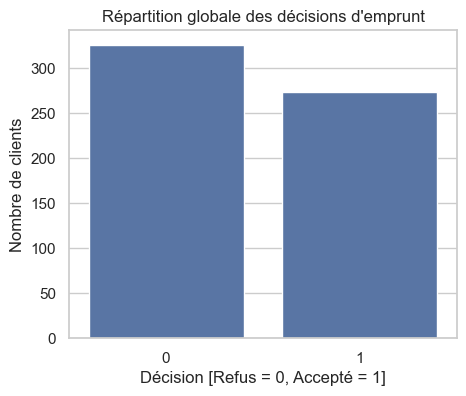

In [6]:
plt.figure(figsize=(5,4))
sns.countplot(x='pep', data=df)
plt.title("Répartition globale des décisions d'emprunt")
plt.xlabel("Décision [Refus = 0, Accepté = 1]")
plt.ylabel("Nombre de clients")
plt.show()

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='pep', y='income', data=df)
plt.title("impact de revenu sur la décision")
plt.xlabel("Décision")
plt.ylabel("Revenu")
plt.show()

### 4.2 Décision selon l'impact du revenu sur la décision

In [48]:
plt.figure(figsize=(7, 4))
sns.hisplot(data=df, x='income', hue='pep', kde=True, bins=30)
plt.title("distribution")
plt.label("revenu")
plt.show()

<Figure size 700x400 with 0 Axes>

<Figure size 700x400 with 0 Axes>

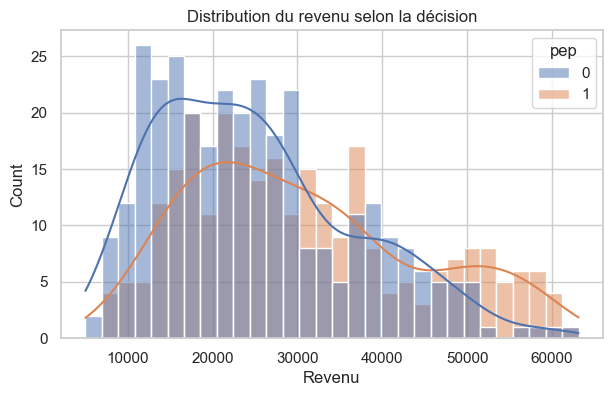

In [46]:
plt.figure(figsize=(7,4))
sns.histplot(data=df, x='income', hue='pep', kde=True, bins=30)
plt.title("Distribution du revenu selon la décision")
plt.xlabel("Revenu")
plt.show()

In [ ]:
plt.figure(figsize=(7, 4))
sns.histplot(data=df, x='age', hue='pep', kde=True)
plt.title("distribution")
plt.xlabel('age')
plt.show()

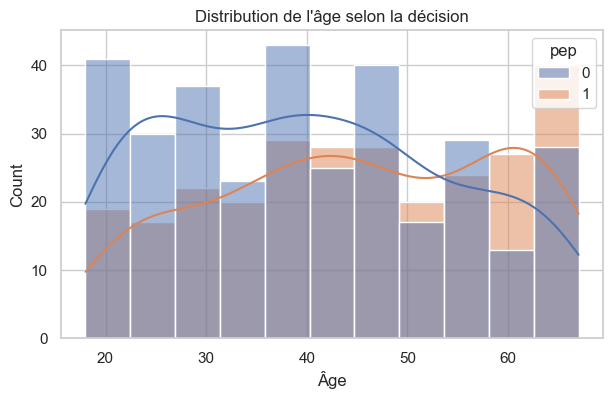

In [8]:
plt.figure(figsize=(7,4))
sns.histplot(data=df, x='age', hue='pep', kde=True)
plt.title("Distribution de l'âge selon la décision")
plt.xlabel("Âge")
plt.show()

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='children', y='income', hue='pep', data=df)
plt.title("Nombre d'enfants vs nombre de revenues")
plt.xlabel("Nombre d'enfants")
plt.ylabel("Nombre de revenues")
plt.show()

<Figure size 600x400 with 0 Axes>

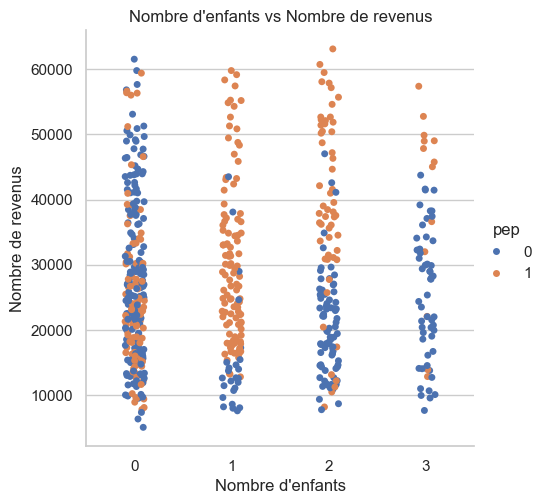

In [55]:
plt.figure(figsize=(6,4))
sns.catplot(x='children',y='income', hue='pep', data=df)
plt.title("Nombre d'enfants vs Nombre de revenus")
plt.xlabel("Nombre d'enfants")
plt.ylabel("Nombre de revenus")
plt.show()

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='id_encoded', y='income', hue='pep', data=df, alpha=0.5)
plt.title("ID encodé vs revenu")
plt.xlabel("Revenu")
plt.show()

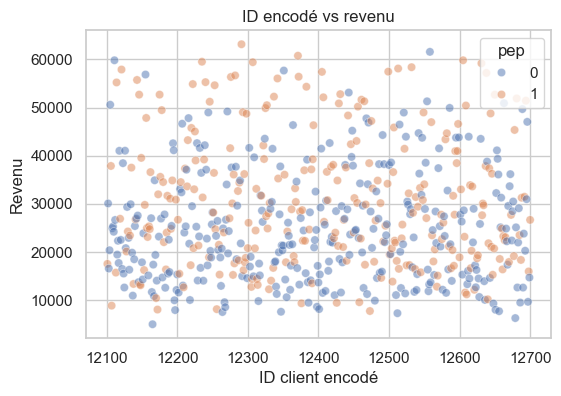

In [60]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='id_encoded', y='income', hue='pep', data=df, alpha=0.5)
plt.title("ID encodé vs revenu")
plt.xlabel("ID client encodé")
plt.ylabel("Revenu")
plt.show()

In [ ]:
plt.figure(figsize=(7, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("correlation entre les variables")
plt.show()

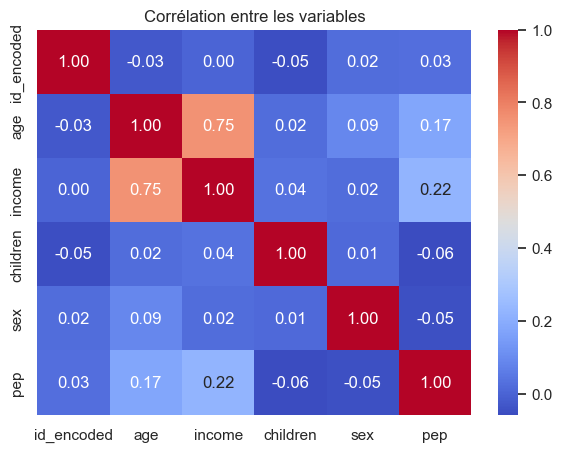

In [11]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélation entre les variables")
plt.show()

In [8]:
# Définir X et y
X = df[['id_encoded', 'age', 'income', 'children', 'sex']]
y = df['pep']

In [ ]:
X=df[['id_encoded', 'age', 'income', 'children', 'sex']]
y=df['pep']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [9]:
# Split train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_transform(X_train, y_train)

In [10]:
# Gestion du déséquilibre
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

In [ ]:
model = RandomForestClassifier(n_estimators=120, max_depth=6, random_state=42)
model.fit(X_train_res, yçtrain_res)

In [11]:
# Random Forest
model = RandomForestClassifier(
    n_estimators=120,
    max_depth=6,
    random_state=42
)
model.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=6, n_estimators=120, random_state=42)

In [ ]:
def emprunter(id_value, age, income, children, sex, model, X_test, seuil=0.7):
    X_client = pd.DataFrame([{'id_encoded':id_value, 'age':age, 'income':income, 'children':children, 'sex':sex}])
    proba_client=model.predict_proba(X_client)[0][1]
    proba_population = model.predict_proba(X_test)[:, 1]
    decision = "OUI" if proba_client >= seuil else "NON"
    return proba_client, proba_population, decision, seuil

In [12]:
def emprunter(id_value, age, income, children, sex, model, X_test, seuil=0.7):
    """Décide si un client peut emprunter ce mois-ci et retourne les informations utiles pour la visualisation"""
    # Données du client
    X_client = pd.DataFrame([{'id_encoded': id_value,'age': age,'income': income,'children': children,'sex': sex}])
    # Probabilité client
    proba_client = model.predict_proba(X_client)[0][1]
    # Distribution population
    proba_population = model.predict_proba(X_test)[:, 1]
    # Décision
    decision = "OUI" if proba_client >= seuil else "NON"
    return proba_client, proba_population, decision, seuil

In [ ]:
proba_client, proba_population, decision, seuil = emprunter(id_value=1, age= 40, income=30085.1, children=3, sex=0, model=model, X_test=X_test, seuil=0.7)

print(f"probabilité dacceptation : {proba_client:.2F}")
print(f"Decision : {decision}")

In [17]:
proba_client, proba_population, decision, seuil = emprunter(
    id_value=200,
    age=36,
    income=48000,
    children=1,
    sex=0
    model=model,
    X_test=X_test,
    seuil=0.7
)
#1	12102	40	30085.1	3	0	0
print(f"Probabilité d'acceptation : {proba_client:.2f}")
print(f"Décision : {decision}")

Probabilité d'acceptation : 0.10
Décision : NON


In [ ]:
plt.figure(figsize=(6, 4))
plt.bahr(["client"], [proba_client], color="steelblue")
plt.axvline(seuil, color="red", linestyle="--", label=f"seuil='{seuil}")
plt.xlim(0, 1)
plt.xlabel("probabilité")
plt.title("Decision d'emprunt - Probabilité du client")
plt.legend()
plt.text(proba_client + 0.02, 0, f"{proba_client:.2f}", va="center")
plt.show()

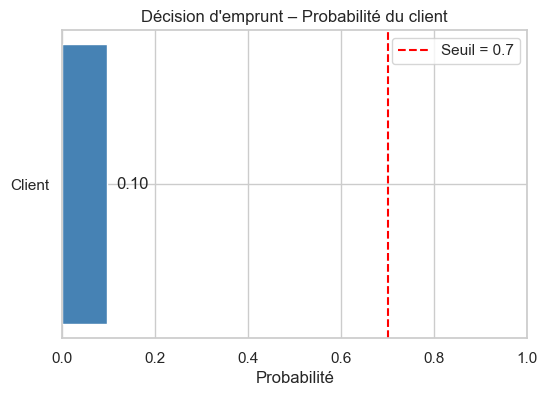

In [18]:
plt.figure(figsize=(6,4))
plt.barh(["Client"], [proba_client], color="steelblue")
plt.axvline(seuil, color="red", linestyle="--", label=f"Seuil = {seuil}")
plt.xlim(0,1)
plt.xlabel("Probabilité")
plt.title("Décision d'emprunt – Probabilité du client")
plt.legend()
plt.text(proba_client + 0.02, 0, f"{proba_client:.2f}", va="center")
plt.show()

In [ ]:
plt.figure()
sns.histplot(proba_population,bins=20, kde=True, color="lightgray")
plt.axvline(proba_client, color="blue", linewidth=2, label="client")
plt.axvline(seuil, color="red", linestyle='--', label="seuil décision")
plt.xlabel("probablité d'acceptation")
plt.ylabel("nombre de clients")
plt.title("position du client par rapport à la population")
plt.legend()
plt.showx()

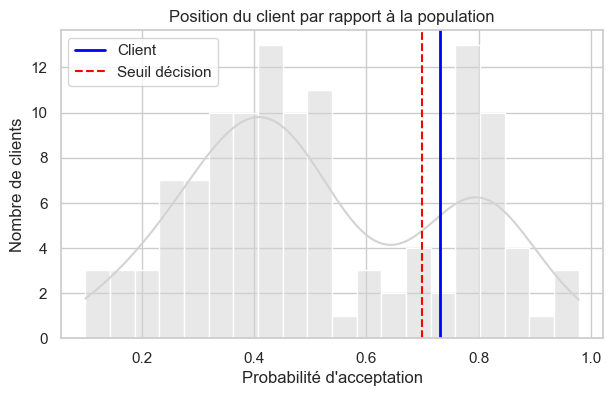

In [15]:
plt.figure(figsize=(7,4))

sns.histplot(proba_population, bins=20, kde=True, color="lightgray")
plt.axvline(proba_client, color="blue", linewidth=2, label="Client")
plt.axvline(seuil, color="red", linestyle="--", label="Seuil décision")

plt.xlabel("Probabilité d'acceptation")
plt.ylabel("Nombre de clients")
plt.title("Position du client par rapport à la population")
plt.legend()

plt.show()


In [ ]:
plt.figure(figsize=(4, 2))
color="green", if decision == "OUI" else "red"
plt. barh(["decision"], [1], color=color)

plt.text(0.5, 0, decision, ha="center", va="center",
         foontsize=16, color="white", fontweight="bold")

plt.axis("off")
plt.title("decision finale")
plt.show()

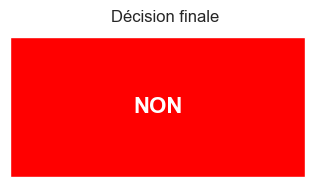

In [19]:
plt.figure(figsize=(4,2))

color = "green" if decision == "OUI" else "red"
plt.barh(["Décision"], [1], color=color)

plt.text(0.5, 0, decision, ha="center", va="center",
         fontsize=16, color="white", fontweight="bold")

plt.axis("off")
plt.title("Décision finale")

plt.show()
